# Network Robustness and Fragility: Percolation on Random Graphs
---

In [1]:
import PercolationAndRobustness as PAR
using Graphs
using Plots
using Colors

In [36]:
#Parameters
tau_arr = [2.4, 2.7, 3.0]
kappa = 30
N = 10^6

1000000

In [43]:
giant_component_result = []
kmax_result = []
percent_removed_result = []
for tau in tau_arr
    graph = PAR.Configuration_Generator(N, tau, kappa)
    max_degree = Δ(graph)
    data_count = 120
    kmax_arr = floor.(Int, LinRange(2, max_degree, data_count))
    giant_component_size_arr = []
    percent_removed_arr = []
    size = []
    for k in kmax_arr
        graph_clone = squash(graph)
        graph_clone, size_diff = PAR.Kmax_Cutoff(graph_clone, k)
        push!(percent_removed_arr, size_diff / N * 100)
        push!(giant_component_size_arr, PAR.large_component_size(graph_clone) / N)
    end
    push!(giant_component_result, giant_component_size_arr)
    push!(kmax_result, kmax_arr)
    push!(percent_removed_result, percent_removed_arr)
end

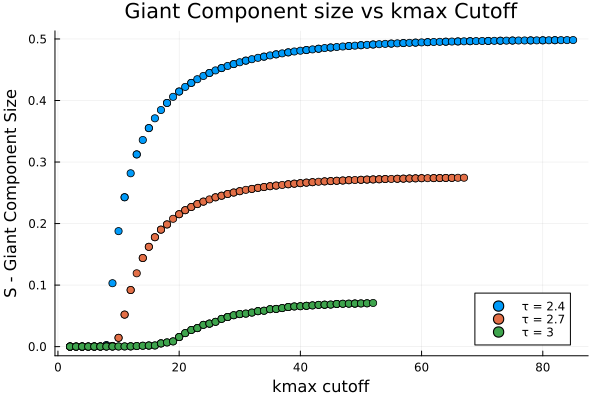

In [44]:
scatter(kmax_result, giant_component_result, title = "Giant Component size vs kmax Cutoff",
xlabel = "kmax cutoff", ylabel = "S - Giant Component Size", label = ["τ = 2.4" "τ = 2.7" "τ = 3"])

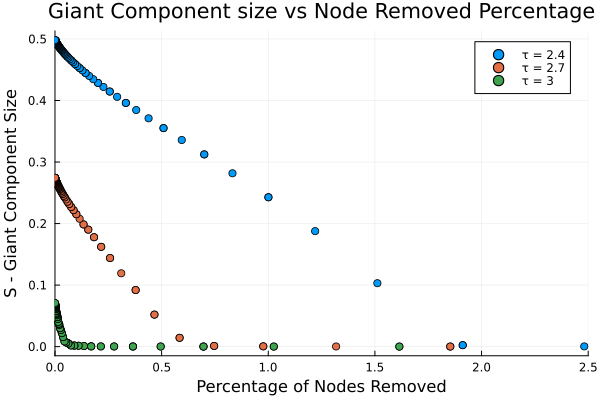

In [45]:
scatter(percent_removed_result, giant_component_result, title = "Giant Component size vs Node Removed Percentage",
xlabel = "Percentage of Nodes Removed", ylabel = "S - Giant Component Size", label = ["τ = 2.4" "τ = 2.7" "τ = 3"], xlims = (0, 2.5))